# 4. Úprava kvality obrazov

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure, transform
from mpl_toolkits.mplot3d import axes3d

In [31]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['font.size'] = 18

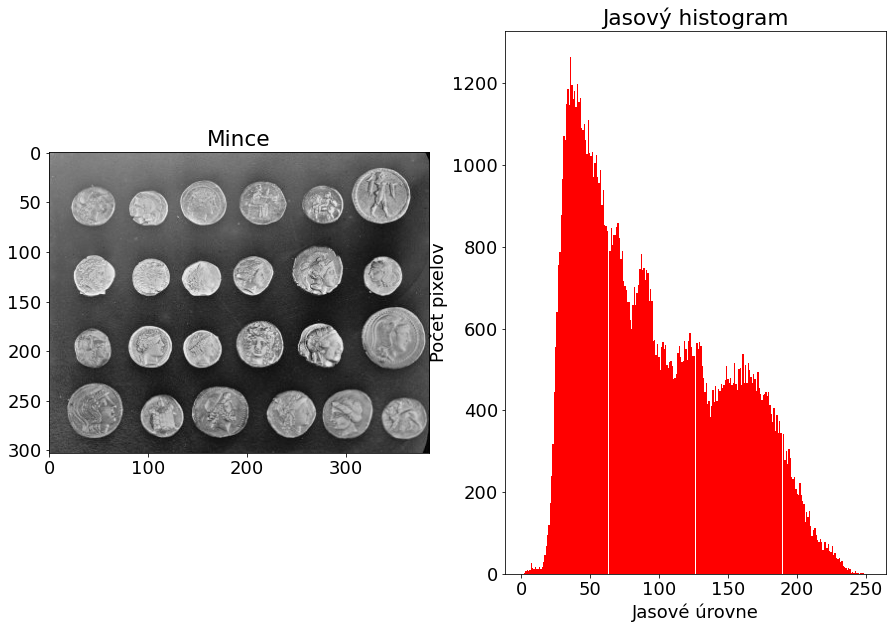

In [32]:
image = data.coins()
plt.figure(figsize=(15, 10))
ax1=plt.subplot(121)
ax1.imshow(image,cmap='gray')
ax1.set_title("Mince")
ax2 = plt.subplot(1,2,2)
ax2.set_title("Jasový histogram")
ax2.set_xlabel("Jasové úrovne")
ax2.set_ylabel("Počet pixelov")
raveled_image = image.ravel()
reshaped_image = np.reshape(image,(image.shape[0]*image.shape[1],))
pt1 = ax2.hist(reshaped_image, bins=255, histtype='bar', color='red');

Histogram definujeme ako zoradené (0-255) početnosti výskytu funkčnej hodnoty šedotonového obrázka.
Na obrázok aplikujeme funkcie na zvýraznenie kontrastu a zobrazíme si jednolive histogramy.

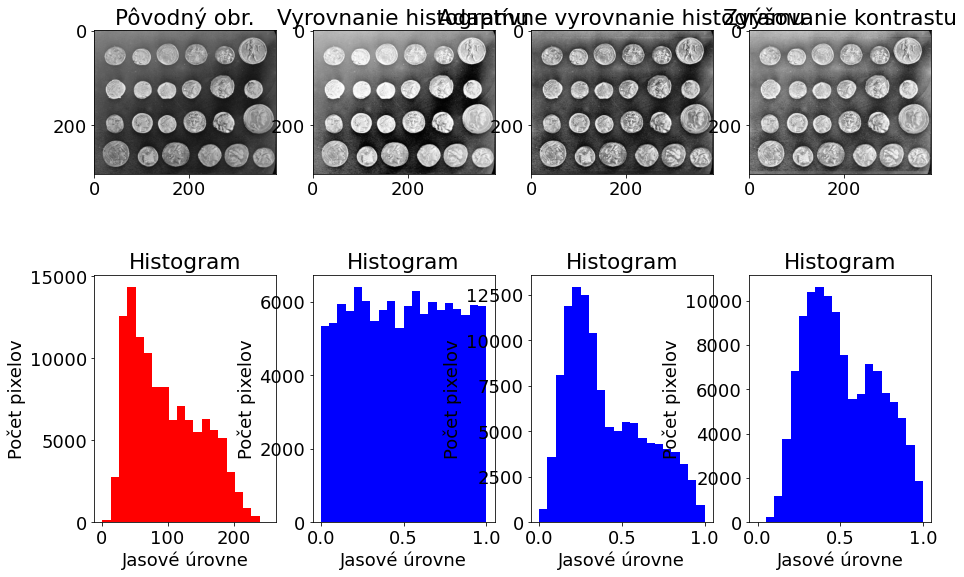

In [33]:
fig, axes = plt.subplots(2,4,figsize=(15, 10))

axes[0,0].imshow(image,cmap='gray')
axes[1,0].hist(image.ravel(), bins=20, histtype='bar', color='red')
axes[1,0].set_title("Histogram")
axes[1,0].set_xlabel("Jasové úrovne")
axes[1,0].set_ylabel("Počet pixelov")
axes[0,0].set_title("Pôvodný obr.")

img_eq = exposure.equalize_hist(image)
axes[0,1].imshow(img_eq,cmap='gray')
axes[1,1].hist(img_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[1,1].set_title("Histogram")
axes[1,1].set_xlabel("Jasové úrovne")
axes[1,1].set_ylabel("Počet pixelov")
axes[0,1].set_title("Vyrovnanie histogramu")

img_adapt_eq = exposure.equalize_adapthist(image)
axes[0,2].imshow(img_adapt_eq,cmap='gray')
axes[0,2].set_title("Adaptívne vyrovnanie histogramu")
axes[1,2].hist(img_adapt_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[1,2].set_title("Histogram")
axes[1,2].set_xlabel("Jasové úrovne")
axes[1,2].set_ylabel("Počet pixelov")

img_contrast_enhanced = exposure.equalize_adapthist(exposure.adjust_gamma(image, 0.5))
axes[0,3].imshow(img_contrast_enhanced,cmap='gray')
axes[0,3].set_title("Zvýšovanie kontrastu");
axes[1,3].hist(img_contrast_enhanced.ravel(), bins=20, histtype='bar', color='blue')
axes[1,3].set_title("Histogram")
axes[1,3].set_xlabel("Jasové úrovne")
axes[1,3].set_ylabel("Počet pixelov");


Podobne postupujeme aj s obrázkom mesiaca. A porovnáme si jednotlive funkcie na zmenu kontrastu. Porovnajte si
adaptivne vyrovnanie histogramu.

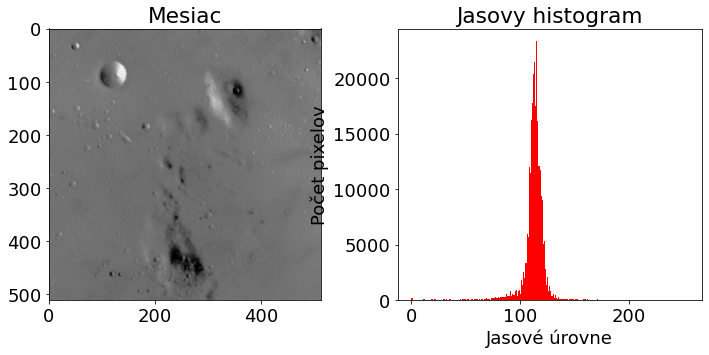

In [34]:
image=data.moon()
plt.figure(figsize=(12, 5))
ax1=plt.subplot(121)
ax1.imshow(image,cmap='gray')
ax1.set_title("Mesiac")
ax2 = plt.subplot(1,2,2)
raveled_image = image.ravel()
pt1 = ax2.hist(np.reshape(image,(image.shape[0]*image.shape[1],)), bins=255, histtype='bar', color='red')
ax2.set_title("Jasovy histogram")
ax2.set_xlabel("Jasové úrovne")
ax2.set_ylabel("Počet pixelov");

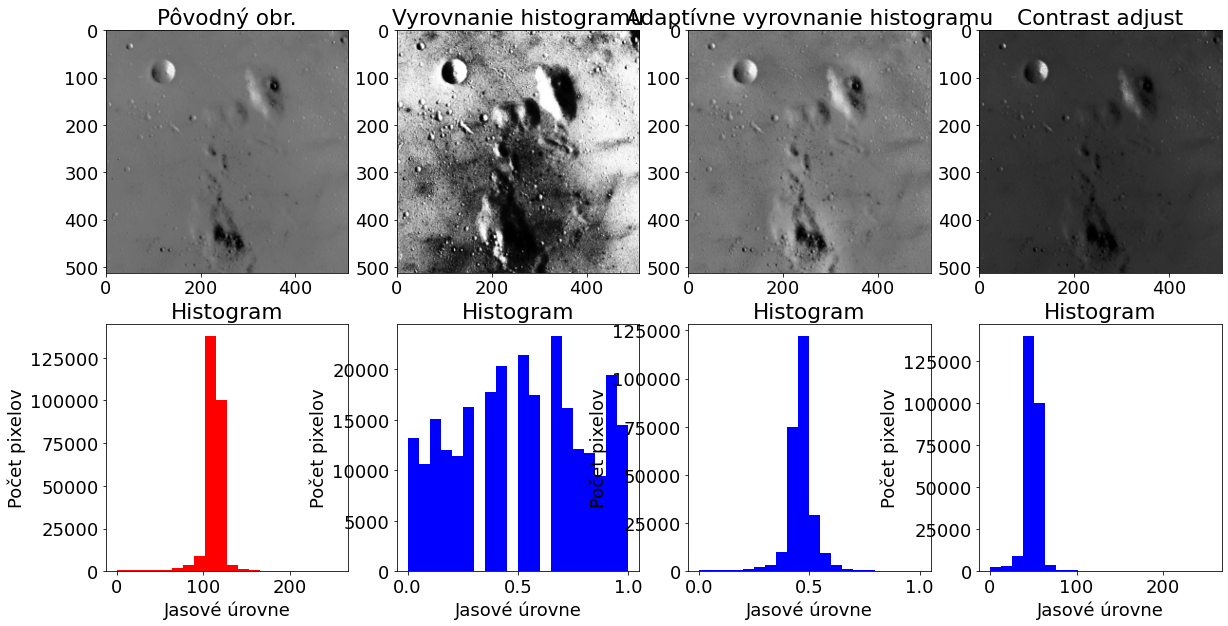

In [35]:
fig, axes = plt.subplots(2,4,figsize=(20, 10))

axes[0,0].imshow(image,cmap='gray')
axes[1,0].set_title("Histogram")
axes[1,0].set_xlabel("Jasové úrovne")
axes[1,0].set_ylabel("Počet pixelov")
axes[1,0].hist(image.ravel(), bins=20, histtype='bar', color='red')
axes[0,0].set_title("Pôvodný obr.")

img_eq = exposure.equalize_hist(image)
axes[0,1].imshow(img_eq,cmap='gray')
axes[1,1].set_title("Histogram")
axes[1,1].set_xlabel("Jasové úrovne")
axes[1,1].set_ylabel("Počet pixelov")
axes[1,1].hist(img_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[0,1].set_title("Vyrovnanie histogramu")

img_adapt_eq = exposure.equalize_adapthist(image)
axes[0,2].imshow(img_adapt_eq,cmap='gray')
axes[1,2].set_title("Histogram")
axes[1,2].set_xlabel("Jasové úrovne")
axes[1,2].set_ylabel("Počet pixelov")
axes[1,2].hist(img_adapt_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[0,2].set_title("Adaptívne vyrovnanie histogramu")

img_contrast_enhanced = exposure.adjust_gamma(image, 2)
axes[0,3].imshow(img_contrast_enhanced,cmap='gray')
axes[0,3].set_title("Contrast adjust");
axes[1,3].set_title("Histogram")
axes[1,3].set_xlabel("Jasové úrovne")
axes[1,3].set_ylabel("Počet pixelov")
axes[1,3].hist(img_contrast_enhanced.ravel(), bins=20, histtype='bar', color='blue');


Úprava jasovej úrovne s použitím vlastnej funkcie.

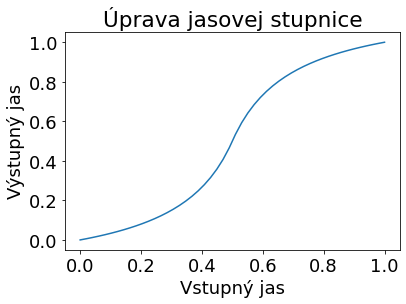

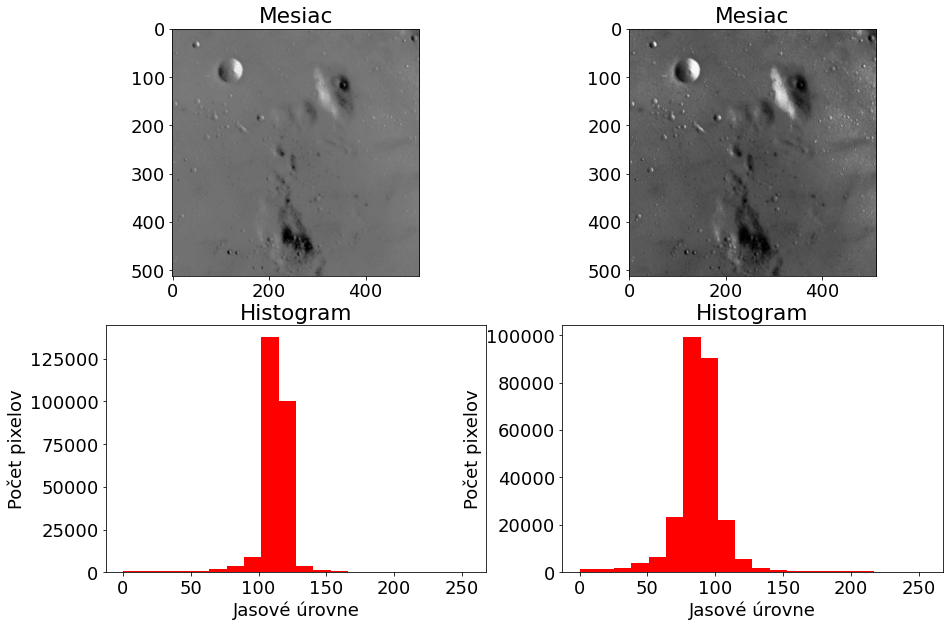

In [36]:
x = np.linspace(0,1,50)
p = 5
c = (0.5*p)/(1+0.5*p)
plt.figure()
y= (((x-0.5)*p)/(1+abs((x-0.5)*p))+c)/(2*c)
plt.plot(x,y)
plt.title('Úprava jasovej stupnice')
plt.xlabel('Vstupný jas')
plt.ylabel('Výstupný jas')

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.title('Mesiac')
plt.imshow(data.moon(),cmap='gray')
plt.subplot(222)
plt.title('Mesiac')
im = data.moon()/255
adj_im = (((im-0.5)*p)/(1+abs((im-0.5)*p))+c)/(2*c)
plt.imshow(adj_im,cmap='gray')
plt.subplot(223)
plt.hist(data.moon().ravel(), bins=20, histtype='bar', color='red')
plt.title("Histogram")
plt.xlabel("Jasové úrovne")
plt.ylabel("Počet pixelov")
plt.subplot(224)
plt.hist((adj_im*255).ravel(), bins=20, histtype='bar', color='red');
plt.title("Histogram")
plt.xlabel("Jasové úrovne")
plt.ylabel("Počet pixelov");

Pomocou 3D reprezentacie farebných spekier obrázka si zobrazíme ich vzájomnú koreláciu.

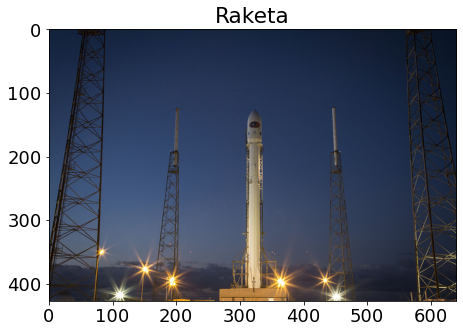

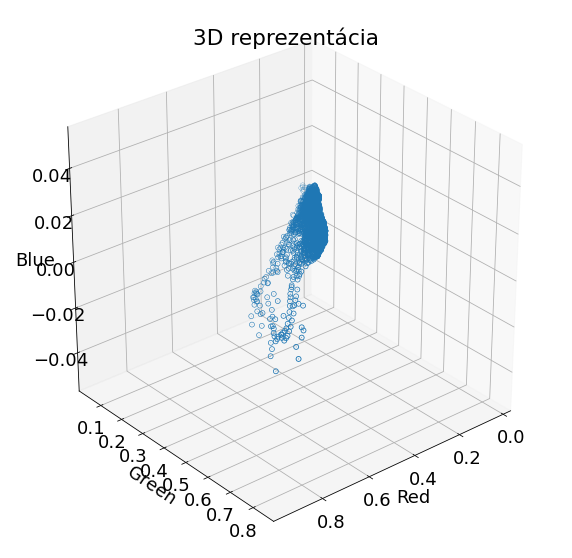

In [40]:
shape = np.floor(np.asarray(data.rocket().shape[0:2])/10).astype(dtype=np.int)
shape = np.hstack((shape, 3))
im =  transform.resize(data.rocket(),shape)
plt.figure(figsize=(10, 5))
plt.imshow(data.rocket())
plt.title("Raketa")
plt.figure(figsize=(10, 10))
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]
ax = plt.axes(projection='3d')
plt.scatter(r.ravel(),g.ravel(),b.ravel(), cmap='viridis', linewidth=5,alpha=1)
plt.title("3D reprezentácia")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.view_init(elev=30., azim=50);

Bonus
1. Vypoctajte kolko roznych histogramov existuje pre sedotonovy obrazok (0-255) s rozmermi h * w (+2b)

2. Do dalsieho cvika JE mozne interaktivne pracovat s plotmi v ipythone teda v notebooku? Najdite opitmalnu kniznicu na interakciu v pythone.
https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
https://matplotlib.org/3.3.1/users/interactive.html
https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook
Za dobre porovnanie 3 kniznic v 2D a 3D aj s  videom a komentarom (+5b)